# Data Analysis

In [25]:
# para manejar conjuntos de datos
import pandas as pd
import numpy as np

# para ploteo
import matplotlib.pyplot as plt
import seaborn as sns

# para la yeo-johnson transformation
import scipy.stats as stats

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)

In [26]:
# cargar dataset
data = pd.read_csv('./Input/train_coche.csv')

# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(1642, 10)


,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


Notamos que la variable running es numérica pero está siendo considerada como categórica por el texto q tiene concatenado. Vamos a convertirla a numérica para proceder con los demás análisis.

In [28]:
data["running"] = data["running"].astype(str)
data["running"] = data["running"].str.replace(" km","")
data["running"] = data["running"].str.replace(" miles","")
data["running"] = data["running"].astype(float)
data["running"]

0         3000.0
1       132000.0
2        95000.0
3       137000.0
4       130000.0
          ...   
1637    120000.0
1638    170000.0
1639     68900.0
1640     31000.0
1641        20.0
Name: running, Length: 1642, dtype: float64

In [29]:
data.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000.0,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000.0,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000.0,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000.0,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000.0,left,black,sedan,good,2.0,26000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   float64
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 128.4+ KB


## Target

Comencemos explorando la distribución del objetivo.

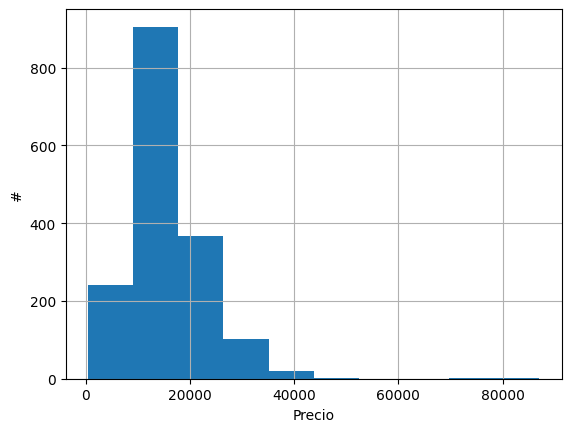

In [31]:

data['price'].hist()#bins=100, density=True)
plt.ylabel('#')
plt.xlabel('Precio')
plt.show()


Podriamos aplicar una transformación logaritmica para mejorar la distribución:

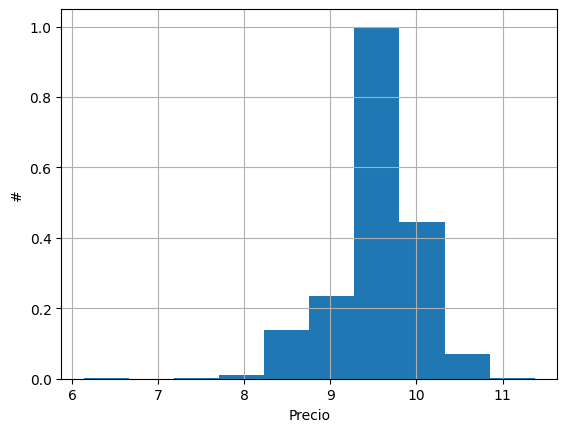

In [32]:
np.log(data['price']).hist(density=True)
plt.ylabel('#')
plt.xlabel('Precio')
plt.show()

<Axes: >

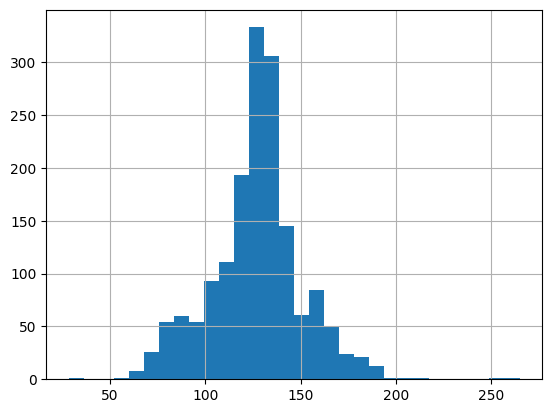

In [33]:
tmp = data.copy()

tmp['price'], param = stats.yeojohnson(data['price'])
tmp['price'].hist(bins=30)

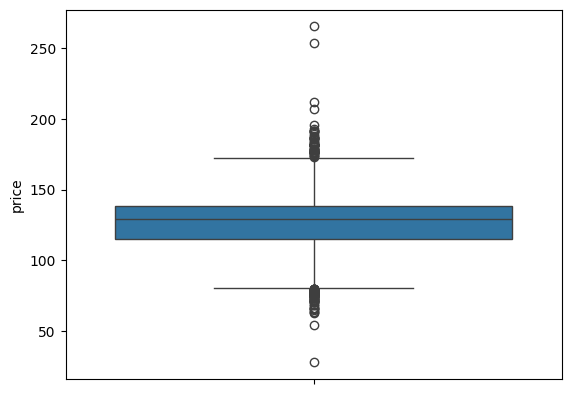

In [34]:
sns.boxplot(tmp['price'])
plt.show()

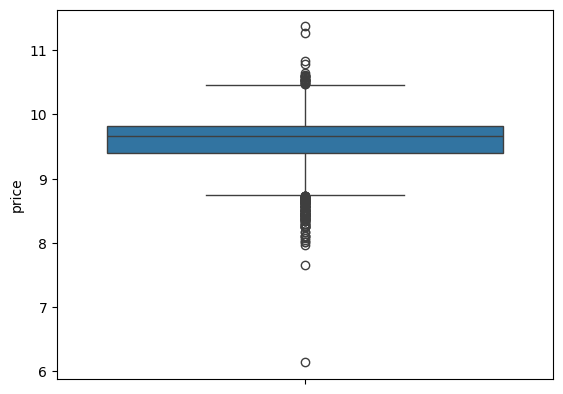

In [11]:
sns.boxplot(np.log(data["price"]))
plt.show()

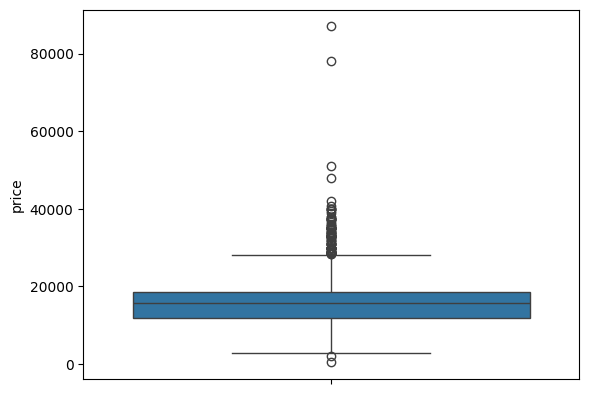

In [94]:
sns.boxplot(data["price"])
plt.show()

## Tipos de Variable

A continuación, identifiquemos las variables categóricas y numéricas.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   float64
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 128.4+ KB


Variables categóricas

In [36]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
len(cat_vars)

6

In [37]:
cat_vars

['model', 'motor_type', 'wheel', 'color', 'type', 'status']

Variables numéricas

In [52]:
# ahora identifiquemos las variables numéricas
num_vars = [var for var in data.columns if var not in cat_vars and var != 'price']
len(num_vars)

3

In [53]:
num_vars

['running', 'motor_volume', 'age']

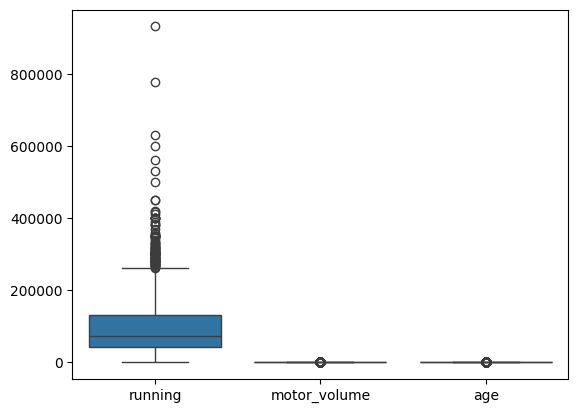

In [54]:
sns.boxplot(data[num_vars])
plt.show()

# Missing values

In [42]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

# Analisis para Tratamiento de Variables Numéricas

In [53]:
data[num_vars].head()

,year,running,motor_volume
0,2022,3000.0,2.0
1,2014,132000.0,2.0
2,2018,95000.0,2.0
3,2002,137000.0,3.2
4,2017,130000.0,2.0


## Variables Temporales

Tenemos 1 variables temporal: **year** que hace referencia al año del modelo del coche

In [43]:
year_vars = [var for var in num_vars if 'year' in var]
year_vars

['year']

In [44]:
for var in year_vars:
    print(var, data[var].unique())
    print()

year [2022 2014 2018 2002 2017 2001 2019 2021 2016 2007 2011 2010 2012 2015
 1997 1998 2008 2009 2023 2020 1999 1995 2000 1996 1993 2006 2013 2003
 1994 2005 2004 1987]



Podemos explorar la evolución con relación a los precios

Text(0, 0.5, 'Median Car Price')

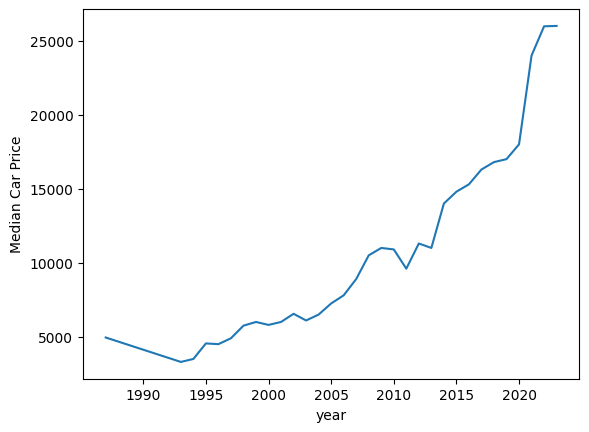

In [45]:
data.groupby('year')['price'].median().plot()
plt.ylabel('Median Car Price')

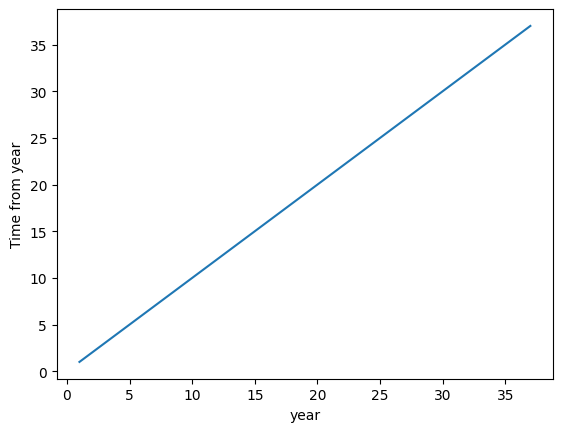

In [46]:
import datetime

cur_data = datetime.datetime.now().year

def analyse_year_vars(df, var):

    df = df.copy()
    df[var] = cur_data - df['year']

    df.groupby('year')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()


for var in year_vars:
        analyse_year_vars(data, var)

Analizamos la data con un scatter plot

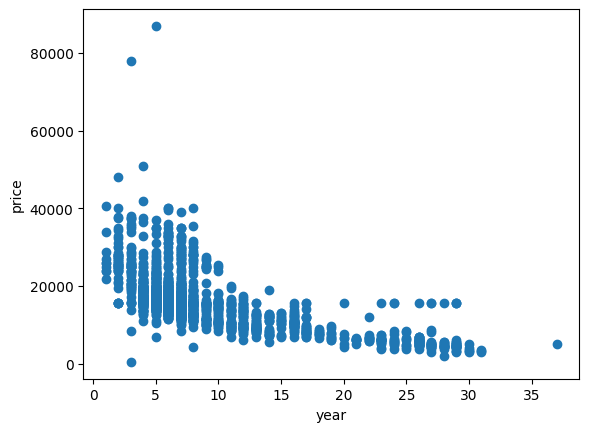

In [47]:
import datetime

cur_data = datetime.datetime.now().year

def analyse_year_vars(df, var):

    df = df.copy()
    df[var] = cur_data - df['year']

    plt.scatter(df[var], df['price'])
    plt.ylabel('price')
    plt.xlabel(var)
    plt.show()


for var in year_vars:
    analyse_year_vars(data, var)

In [49]:
import datetime

cur_data = datetime.datetime.now().year
data['age'] = cur_data - data['year']

In [50]:
data.drop(columns='year', axis=1 , inplace=True)

In [ ]:
num_vars = [var for var in data.columns if var not in cat_vars and var != 'price']
len(num_vars)

## Variables Discretas

In [55]:
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20]
print('Numero de Variables Discretas: ', len(discrete_vars))

Numero de Variables Discretas:  0


## Variables Continuas

In [56]:
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]

print('Número de variables continuas: ', len(cont_vars))

Número de variables continuas:  3


In [57]:
data[cont_vars].head()

,running,motor_volume,age
0,3000.0,2.0,2
1,132000.0,2.0,10
2,95000.0,2.0,6
3,137000.0,3.2,22
4,130000.0,2.0,7


# Histograma de variables continuas

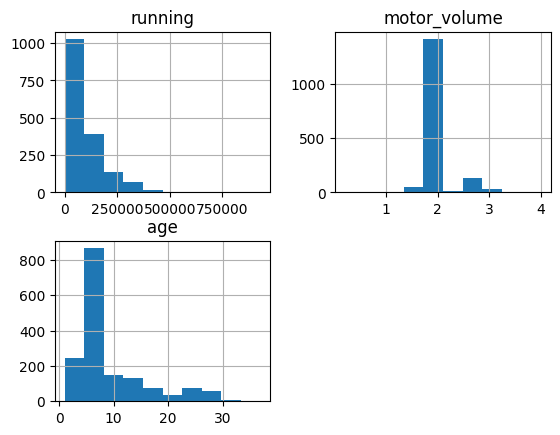

In [58]:
data[cont_vars].hist()
plt.show()

### Transformation Logaritmica

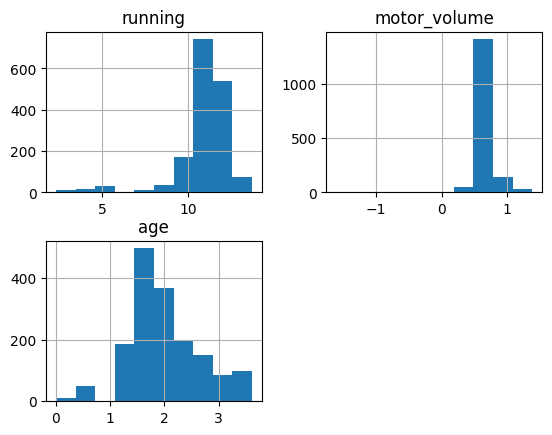

In [59]:
tmp = data.copy()

for var in cont_vars:
    tmp[var] = np.log(data[var])

tmp[cont_vars].hist()
plt.show()

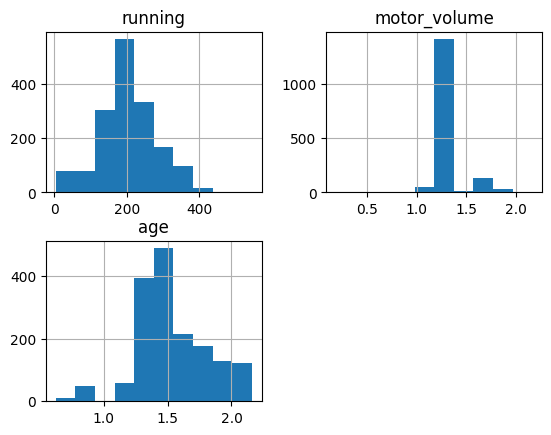

In [60]:
tmp = data.copy()

for var in cont_vars:
    tmp[var],param = stats.yeojohnson(data[var])

tmp[cont_vars].hist()
plt.show()

In [64]:
tmp.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,8.006368,left,skyblue,sedan,excellent,0.693147,24500
1,mercedes-benz,2014,petrol,11.790557,left,black,sedan,excellent,0.693147,25500
2,kia,2018,petrol,11.461632,left,other,sedan,excellent,0.693147,11700
3,mercedes-benz,2002,petrol,11.827736,left,golden,sedan,excellent,1.163151,12000
4,mercedes-benz,2017,petrol,11.775290,left,black,sedan,good,0.693147,26000


Notamos que no hay mucha diferencia tras las transformación

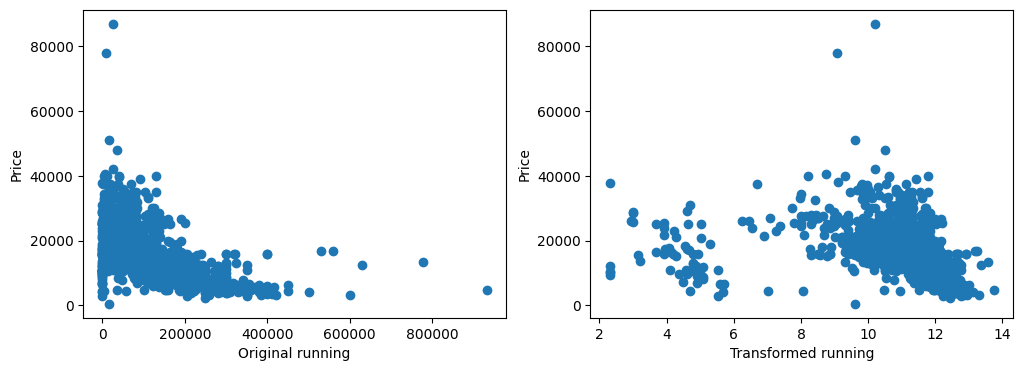

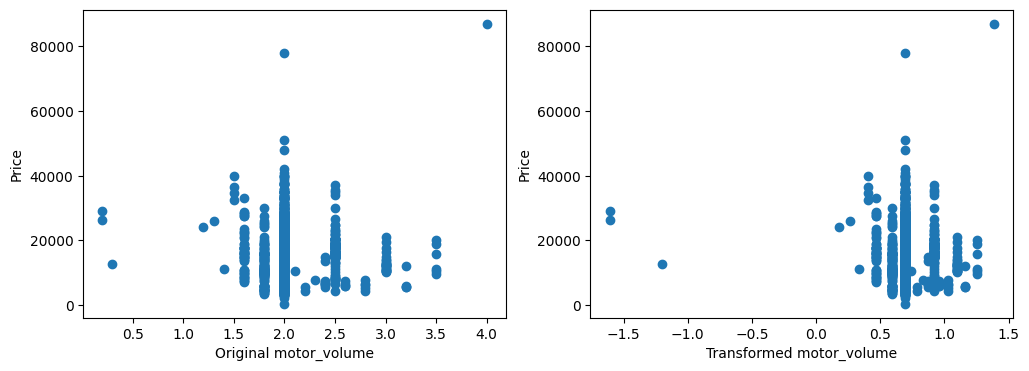

In [65]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in cont_vars:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var],(data['price']))
    plt.ylabel('Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], (tmp['price']))
    plt.ylabel('Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

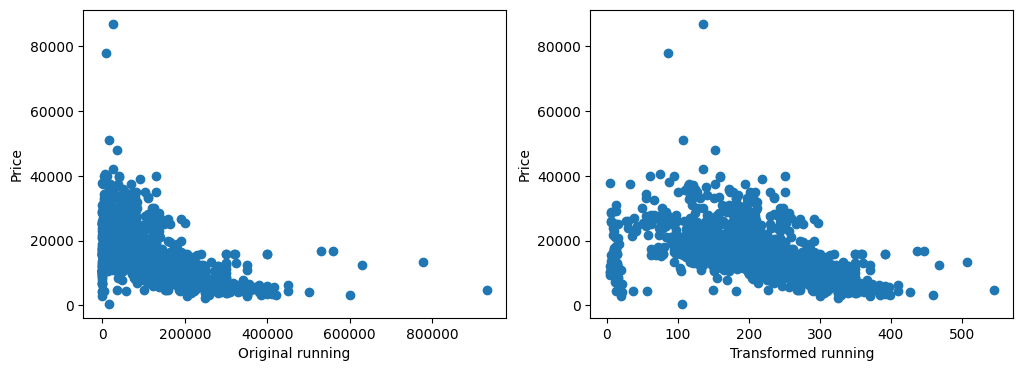

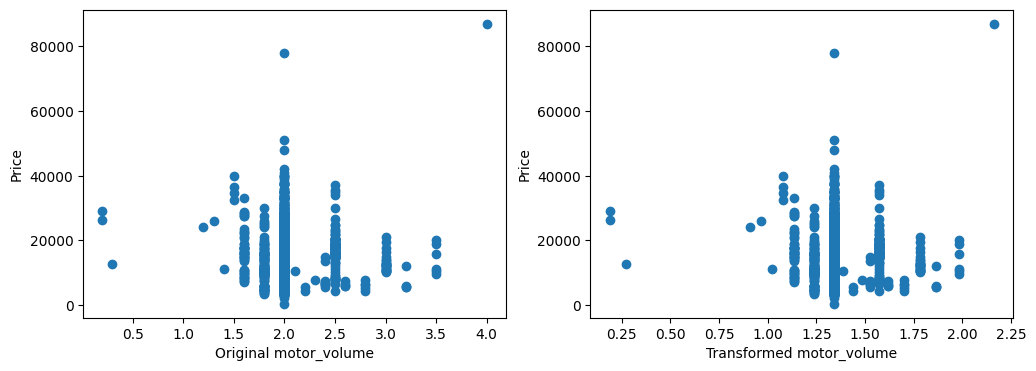

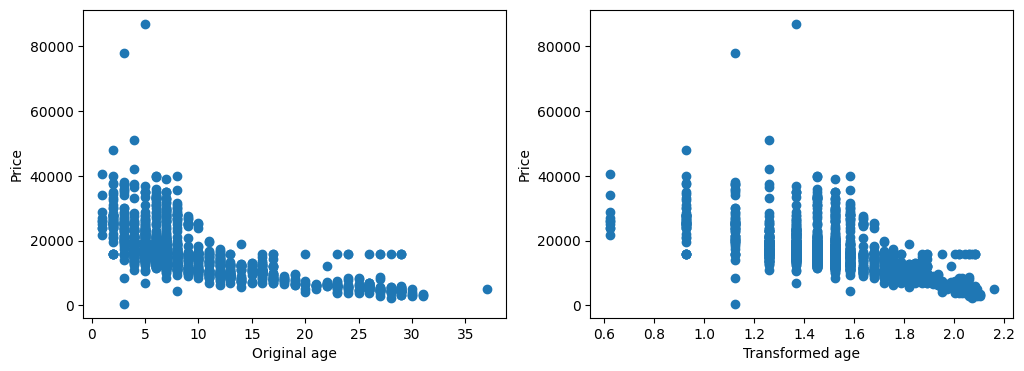

In [61]:
for var in cont_vars:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var],(data['price']))
    plt.ylabel('Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], (tmp['price']))
    plt.ylabel('Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

Notamos que hay una ligera mejora

# Variables Categóricas

In [62]:
print('Numero de Variables Categóricas: ', len(cat_vars))

Numero de Variables Categóricas:  6


In [63]:
data[cat_vars].head()

,model,motor_type,wheel,color,type,status
0,toyota,petrol,left,skyblue,sedan,excellent
1,mercedes-benz,petrol,left,black,sedan,excellent
2,kia,petrol,left,other,sedan,excellent
3,mercedes-benz,petrol,left,golden,sedan,excellent
4,mercedes-benz,petrol,left,black,sedan,good


## Cardinalidad

<Axes: >

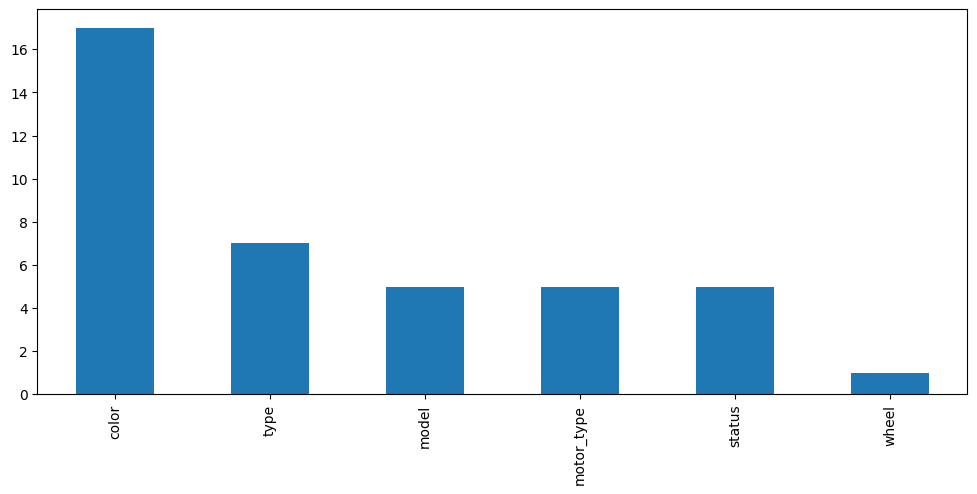

In [64]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [69]:
data["color"].unique()

array(['skyblue', 'black', 'other', 'golden', 'blue', 'gray', 'silver',
       'white', 'clove', 'orange', 'red', 'green', 'cherry', 'brown',
       'beige', 'purple', 'pink'], dtype=object)

In [70]:
data["type"].unique()

array(['sedan', 'suv', 'Universal', 'Coupe', 'pickup', 'hatchback',
       'minivan / minibus'], dtype=object)

In [71]:
data["model"].unique()

array(['toyota', 'mercedes-benz', 'kia', 'nissan', 'hyundai'],
      dtype=object)

Podemos aplicar LabelEncoder, inlcuyendo a la variable **Target**

In [73]:
data["motor_type"].unique()

array(['petrol', 'gas', 'petrol and gas', 'diesel', 'hybrid'],
      dtype=object)

In [74]:
data["status"].unique()

array(['excellent', 'good', 'crashed', 'normal', 'new'], dtype=object)

In [75]:
data["wheel"].unique()

array(['left'], dtype=object)

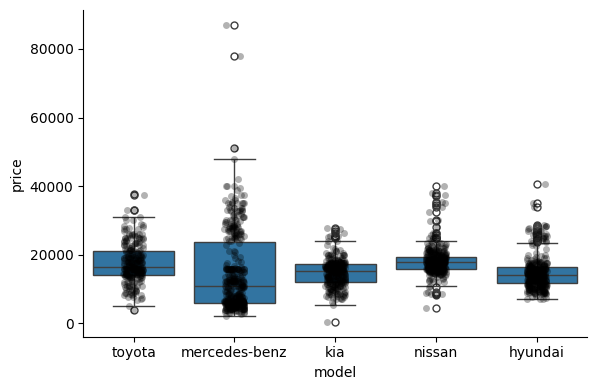

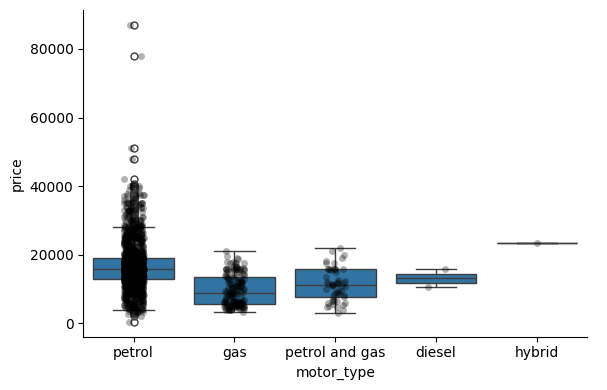

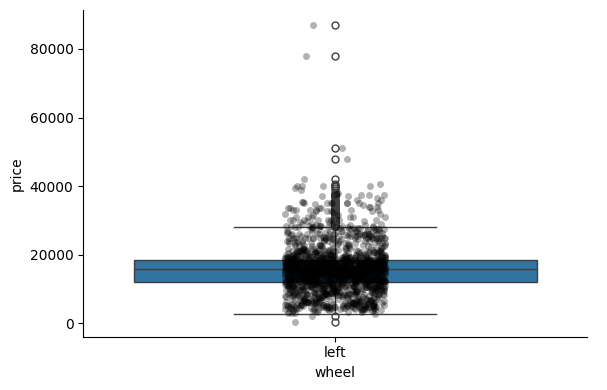

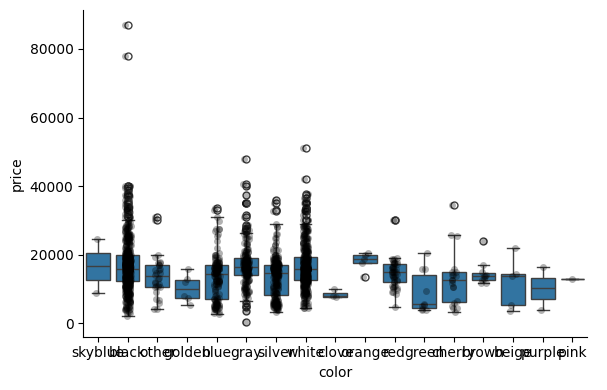

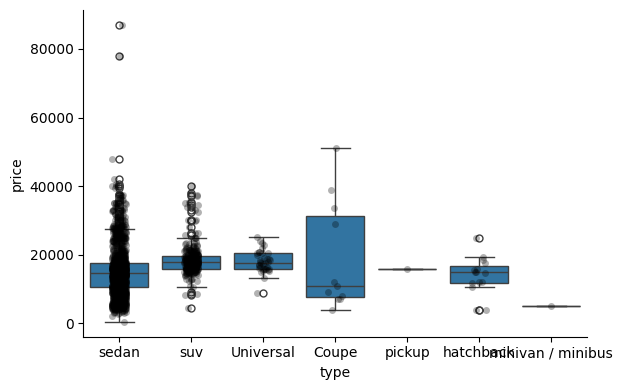

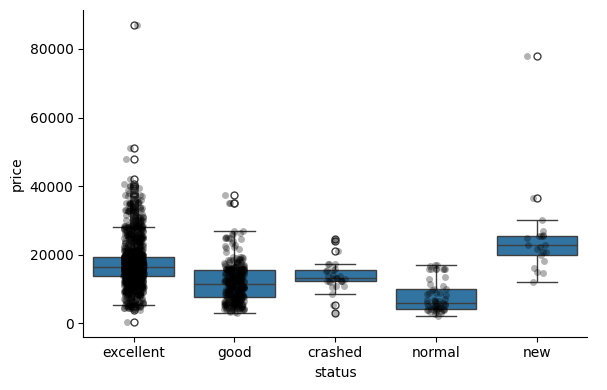

In [65]:

for var in cat_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='price', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='price', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

### Label Encoder

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   float64
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 128.4+ KB


In [79]:
cat_vars

['model', 'motor_type', 'wheel', 'color', 'type', 'status']

In [80]:
# Se aplicará a todos las columnas de tipo Object, inclyendo la variable target
for col in data.columns[data.dtypes=='object']:
    data[col]=le.fit_transform(data[col])   # Encoding

In [82]:
data[cat_vars].head()

,model,motor_type,wheel,color,type,status
0,4,3,0,15,5,1
1,2,3,0,1,5,1
2,1,3,0,10,5,1
3,2,3,0,6,5,1
4,2,3,0,1,5,2


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   int32  
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   int32  
 3   running       1642 non-null   float64
 4   wheel         1642 non-null   int32  
 5   color         1642 non-null   int32  
 6   type          1642 non-null   int32  
 7   status        1642 non-null   int32  
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(2), int32(6), int64(2)
memory usage: 89.9 KB


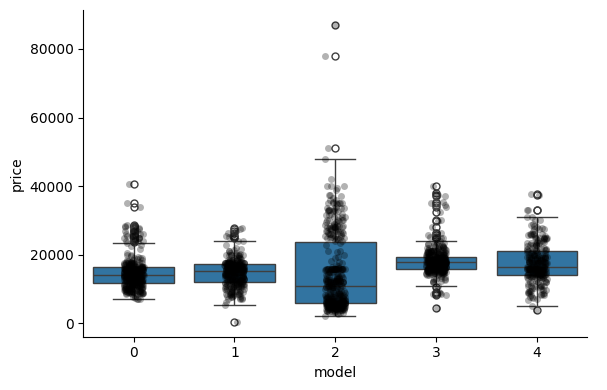

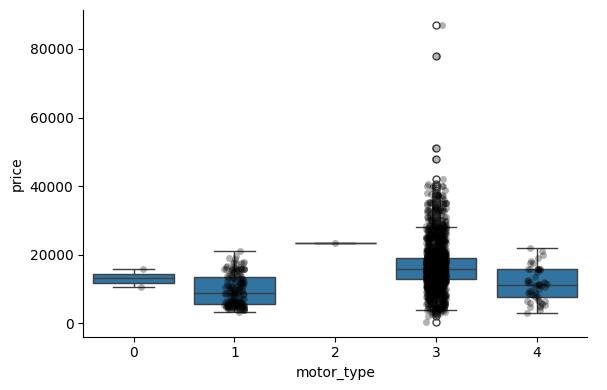

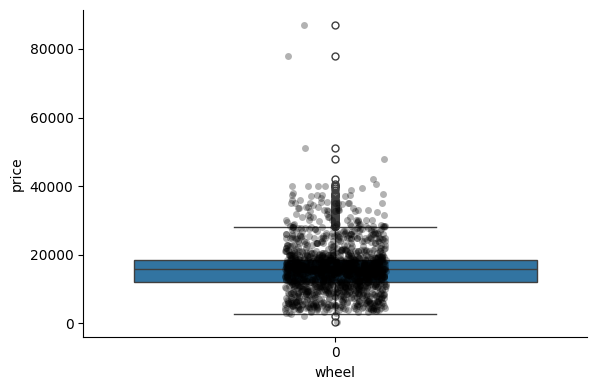

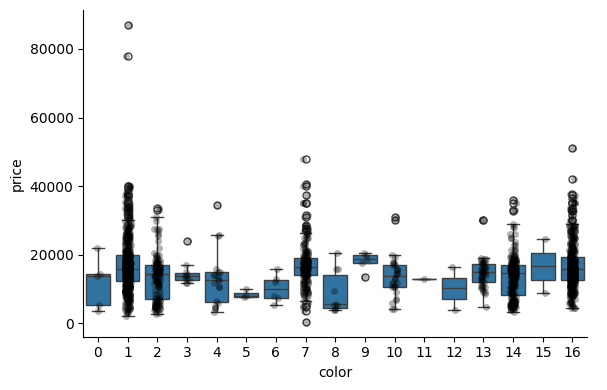

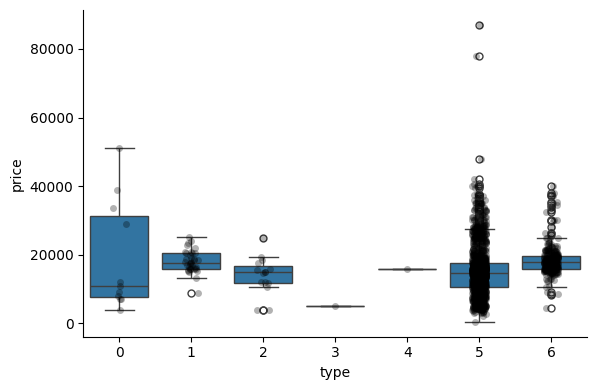

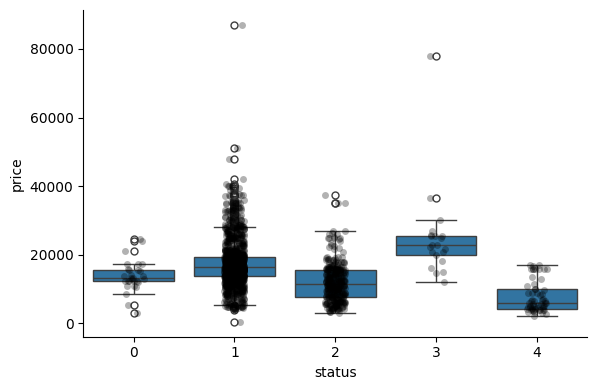

In [84]:
for var in cat_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='price', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='price', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()